In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
# import random
import os
from scipy.fft import fft, fftfreq

# Generate signal

Text(0.5, 0, 'sec')

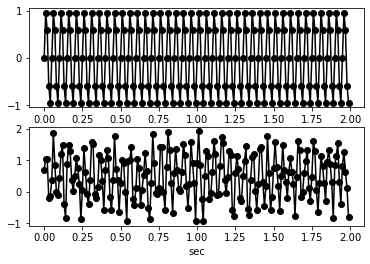

In [3]:
# signal sinwave
# y = sin(wt) 
# y = sin(2*pi*f*t)

# Generate signal
fsig = 20 # Hz

# sampling rate 
fs=100 # Hz
Ts=1/fs # Period
lenSignal = 2 # sec
# create time stamp
t = np.arange(0,lenSignal,Ts)

nPointSig = len(t)
noise = np.random.rand(nPointSig)
y = np.sin(2*math.pi*fsig*t)
yMeasure = y + noise

plt.subplot(211)
plt.plot(t,y,'ko-')
plt.xlabel('sec')
plt.subplot(212)
plt.plot(t,yMeasure,'ko-')
plt.xlabel('sec')


# FFT and Find signal frequency

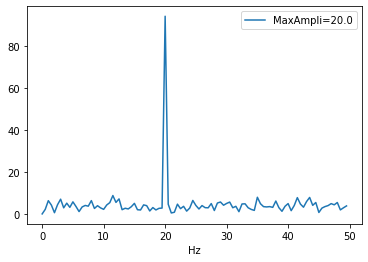

In [4]:
nPointSig = len(yMeasure)

# Remove offset 
yMeasure_preprocess = yMeasure - np.mean(yMeasure)
# yMeasure_preprocess = yMeasure

# --- Calculate FFT
yFreq = fft(yMeasure_preprocess)
# Normaly output of fft contain real and imagine number
yFreq_abs = np.abs(yFreq)

# --- Create frequency axis 
xFreq = fftfreq(nPointSig, Ts)

# --- Select only half side of spectrum
yFreq_abs = yFreq_abs[0:int(nPointSig/2)]
xFreq = xFreq[0:int(nPointSig/2)]

# --- Maximum frequency 
indexFreqMax = np.argmax(yFreq_abs)
sigFreq = xFreq[indexFreqMax]

# --- Visualize
plt.plot(xFreq,yFreq_abs)
plt.xlabel('Hz')
plt.legend(['MaxAmpli='+str(sigFreq)])

# Area under frequency doman